<!--start-block-->
<hr style="height: 1px;">
<i>This code was authored by the 8.S50x Course Team, Copyright 2021 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

# RECITATION 3: Fitting and `LMFIT` Software

<br>
<!--end-block--> 

<!--start-block-->
<hr style="height: 1px;">

## 3.0 Overview of Learning Objectives

In this recitation we will explore the following objectives:

- Fitting with the software package `LMFIT`
- A second `LMFIT` example
- An `LMFIT` example more related to your project
- How to interpret bugs using `LMFIT`

<br>
<!--end-block-->

<!--start-block-->
<hr style="height: 1px;">

## 3.1 Using `LMFIT` to fit to data

To get some practice fitting, suppose you have some data coming from the function $y=2x$.

<!--end-block-->

<!--start-block-->
#### <span style="color:green">>>>RUN</span>

Let's generate some example data with made-up systematic uncertainties. These uncertainties are assumed to be the standard deviations of normal distributions (a common assumption). Therefore, we draw each data point $y_i$ from a normal distribution with standard deviation equal to the uncertainty of point $i$ and mean $2 x_i$.

<!--
#initial code
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(421421)

xi = np.array([2,3,4,5,6,7])
yi = 2*xi

yerr = np.array([0.3, 0.4, 0.45, 0.35, 0.6, 0.5])
yi = yi + yerr*np.random.randn(len(xi))
-->

<!--end-block-->

In [53]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(421421)

xi = np.array([2,3,4,5,6,7])
yi = 2*xi

yerr = np.array([0.3, 0.4, 0.45, 0.35, 0.6, 0.5])
yi = yi + yerr*np.random.randn(len(xi))

<!--start-block-->
#### <span style="color:#BA2220">>>>EXERCISE</span>

Plot the data and its error bars.

<!--
#initial code
import matplotlib.pyplot as plt

#your code here
-->

<!--
#solution
import matplotlib.pyplot as plt

plt.errorbar(xi, yi, yerr=yerr, linestyle='none')
plt.scatter(xi, yi)
plt.plot(xi, 2 * xi)
plt.xlabel("x")
plt.ylabel("y");
-->

ValueError: The lengths of the data (6) and the error 20 do not match

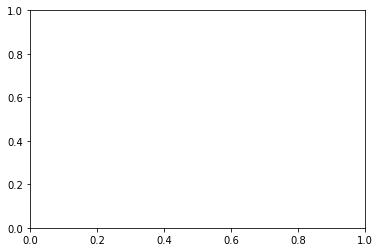

In [65]:
import matplotlib.pyplot as plt

plt.errorbar(xi, yi, yerr=yerr, linestyle='none')
plt.scatter(xi, yi)
plt.plot(xi, 2 * xi)
plt.xlabel("x")
plt.ylabel("y");

<!--start-block-->
#### <span style="color:green">>>>RUN</span>

We'll make a model using `LMFIT` to represent the data. Models can either be selected from a [large list of functions](https://lmfit.github.io/lmfit-py/builtin_models.html) already set up by `LMFIT`, or you can make them yourself. Here we use a preset linear model.

<!--
#initial code
from lmfit.models import LinearModel
model = LinearModel()
-->

<!--end-block-->

In [51]:
from lmfit.models import LinearModel
model = LinearModel()

<!--start-block-->
#### <span style="color:green">>>>RUN</span>

In tomorrow's lecture, you'll learn about the math behind fitting. But for now, let's let `LMFIT` black box it for us. Just know that `LMFIT` is doing a minimization algorithm behind the scenes.

<b>Important:</b> set the weights equal to one over the systematic uncertainty. Not the uncertainty itself, and not the variance.

<!--
#initial code
result = model.fit(yi, x=xi, weights=1/yerr);

print(result.fit_report())
-->

<!--end-block-->

In [52]:
result = model.fit(yi, x=xi, weights=1/yerr);

print(result.fit_report())

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 6
    # variables        = 2
    chi-square         = 4.23466092
    reduced chi-square = 1.05866523
    Akaike info crit   = 1.90926274
    Bayesian info crit = 1.49278168
[[Variables]]
    slope:      1.93632021 +/- 0.10004787 (5.17%) (init = 1)
    intercept:  0.27253202 +/- 0.42745210 (156.84%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.919


<!--start-block-->

Look in the `Variables` section: we have a slope of about 2 and an intercept of about zero, consistent with the true model! Very helpfully, `LMFIT` also gives you uncertainties on the fit parameters. You'll learn how `LMFIT` does this tomorrow, as well as what the `chi-square` and `reduced chi-square` entries are.

<!--end-block-->

<!--start-block-->
#### <span style="color:green">>>>RUN</span>

There's one more thing to do: it's always a good idea to verify that your model actually fits your data. So let's plot the data together with the model.

<!--
#initial code
result.plot();
-->

<!--end-block-->

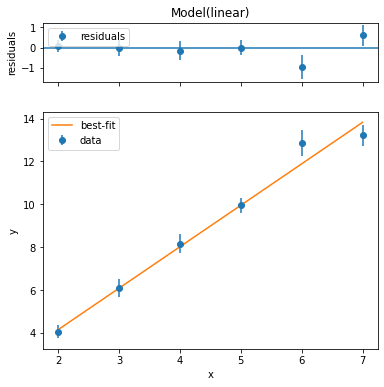

In [54]:
result.plot();

<!--start-block-->

You can see that the model fits the data very well in the bottom plot, and the top plot demonstrates that deviations of the data from the model are random; they don't seem correlated with $x$ nor with each other. This is a good thing, because `LMFIT` assumed that the data points were uncorrelated with each other when performing the fit.


<!--end-block-->

<!--start-block-->

<hr style="height: 1px;">

## 3.2 Another `LMFIT` example

Fitting using a pre-determined model is all well and good, but how do you fit to data using your own model function?

<!--end-block-->

<!--start-block-->
#### <span style="color:green">>>>RUN</span>

Let's arbitrarily choose the function
$$f(x) = \frac{\cos(kx)}{x^a}$$
as our model, with free parameters $k \in \mathbb{R}$ and $a > 0$.

<!--
#initial code
import numpy as np

def model_fn(x, k, a):
    return np.cos(k * x) / x**a
-->

<!--end-block-->

In [56]:
import numpy as np

def model_fn(x, k, a):
    return np.cos(k * x) / x**a

<!--start-block-->
#### <span style="color:#BA2220">>>>EXERCISE</span>

Generate some synthetic data using this model function, with 20 $x$ coordinates spaced evenly in $(0.1, \pi]$. Use true values of $k=\pi$ and $a=1$.

Generate systematic uncertainty from a uniformly random distribution in the range $[0.1, 0.5]$ (`np.random.random()`). Assume that this uncertainty is the standard deviation of a normal distribution for the sake of randomizing your data (`np.random.randn()`).

<!--
#initial code
import numpy as np
np.random.seed(2345789)

TRUE_K = np.pi
TRUE_A = 1

x = np.linspace(-4 * np.pi, 4 * np.pi, 20)
y = #your code here
yerr = #your code here
-->

<!--
#solution
import numpy as np
np.random.seed(2345789)

TRUE_K = np.pi
TRUE_A = 1

x = np.linspace(0.1, np.pi, 20)
y = model_fn(x, TRUE_K, TRUE_A)

yerr = 0.1 + 0.4 * np.random.random(len(x))
y = y + np.random.randn(len(x)) * yerr;
-->

In [63]:
import numpy as np
np.random.seed(2345789)

TRUE_K = np.pi
TRUE_A = 1

x = np.linspace(0.1, np.pi, 20)
y = model_fn(x, TRUE_K, TRUE_A)

yerr = 0.1 + 0.4 * np.random.random(len(x))
y = y + np.random.randn(len(x)) * yerr;

<!--start-block-->
#### <span style="color:#BA2220">>>>EXERCISE</span>

Generate some synthetic data using this model function, with $x$ coordinates spaced evenly in $(0, 4\pi]$. Use true values of $k=\pi$ and $a=1$.

Generate systematic uncertainty from a uniformly random distribution in the range $[0.1, 0.5]$ (`np.random.random()`). Assume that this uncertainty is the standard deviation of a normal distribution for the sake of randomizing your data (`np.random.randn()`).

Plot your data with error bars and the true distribution over it.

<!--
#initial code
import matplotlib.pyplot as plt

#your code here
-->

<!--
#solution
import matplotlib.pyplot as plt
                                                                                                
plt.errorbar(x, y, yerr, linestyle='none')
plt.plot(x, model_fn(x, TRUE_K, TRUE_A), label="true")
plt.scatter(x, y, label="data")
plt.legend()
plt.xlabel("x")
plt.ylabel("y");
-->

Text(0, 0.5, 'y')

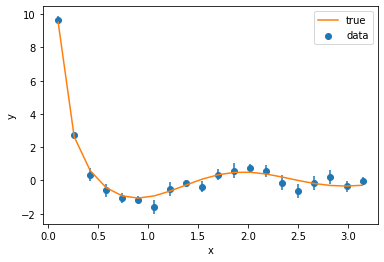

In [64]:
import matplotlib.pyplot as plt

plt.errorbar(x, y, yerr, linestyle='none')
plt.plot(x, model_fn(x, TRUE_K, TRUE_A), label="true")
plt.scatter(x, y, label="data")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

<!--start-block-->
#### <span style="color:green">>>>RUN</span>

Now we need to give this model to `LMFIT`. This involves making a `Model` object, and giving it a `Parameters` object to describe the model parameters.

Each parameter has `min`, `max`, and `value` arguments that specify the minimum allowable value, the maximum value, and the initial value respectively. None of these are required, but it's often a good idea to put them in if you expect your values to be within a certain range.

<!--
#initial code
from lmfit import Model, Parameters

model = Model(model_fn)
params = Parameters()
params.add('k', min=0, max=5, value=1)
params.add('a', min=0, max=3, value=2)
-->

<!--end-block-->

In [66]:
from lmfit import Model, Parameters

model = Model(model_fn)
params = Parameters()
params.add('k', min=0, max=5, value=1)
params.add('a', min=0, max=3, value=2)

<!--start-block-->
#### <span style="color:green">>>>RUN</span>

Finally, let's run the fit! We reuse the code from the previous example, but we have to pass `params` into the fit function this time.

<!--
#initial code
result = model.fit(y, params, x=x, weights=1/yerr);

print(result.fit_report())

result.plot();
-->

<!--end-block-->

[[Model]]
    Model(model_fn)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 22
    # data points      = 20
    # variables        = 2
    chi-square         = 11.9922753
    reduced chi-square = 0.66623752
    Akaike info crit   = -6.22939109
    Bayesian info crit = -4.23792655
[[Variables]]
    k:  3.20037738 +/- 0.06674182 (2.09%) (init = 1)
    a:  1.00936920 +/- 0.00760190 (0.75%) (init = 2)
[[Correlations]] (unreported correlations are < 0.100)
    C(k, a) =  0.224


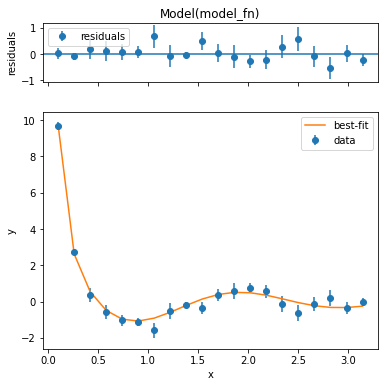

In [67]:
result = model.fit(y, params, x=x, weights=1/yerr);

print(result.fit_report())

result.plot();

<!--start-block-->
#### <span style="color:purple">>>>QUESTION</span>


Do your results agree with the true values? Which was determined with higher precision: $k$ or $a$? Does this make sense given your knowledge of the model function and the systematic uncertainty?

<!--
#solution
They do agree. $a$ can be fitted with higher precision because it controls the height of the first data point very precisely; a small change in $a$ will change the height of the first data point dramatically. However, $k$ is dominated by the data points at large $x$, which have small $y$ values compared to their error bars.
-->


<br>
<!--end-block-->

<!--start-block-->

<hr style="height: 1px;">

## 3.3 A more relevant `LMFIT` example

Let's apply `LMFIT` in a setting more related to your project: we'll investigate a famous LIGO signal.

<!--end-block-->

<!--start-block-->
#### <span style="color:green">>>>RUN</span>

Download the signature of the first black hole detected (GW150914) from [the LIGO data archive]() and save it to the directory of this notebook. Then run this code.

<!--
#initial code
-->

<!--end-block-->

In [69]:
from functions import gwfreq, osc_scale, osc, lower, higher
from gwpy.timeseries import TimeSeries
import h5py
from scipy.interpolate import interp1d

import os

fn = 'H-H1_GWOSC_16KHZ_R1-1126257415-4096.hdf5' # data file
tevent = 1126259462.422 # Mon Sep 14 09:50:45 GMT 2015
evtname = 'GW150914' # event name

detector = 'H1' # detecotr: L1 or H1

strain = TimeSeries.read(fn, format='hdf5.losc')
center = int(tevent)
strain = strain.crop(center-16, center+16)
asd = strain.asd(fftlength = 1)

NRtime, NR_H1 = np.genfromtxt('GW150914_4_NR_waveform.txt').transpose()
nrdata= TimeSeries(NR_H1, times = NRtime)

SyntaxError: invalid syntax (functions.py, line 68)

Define a function that whitens and filters the data.

In [ ]:
def whiten_and_bandpass(strain, asd, bp_low, bp_high):
    fft = strain.fft()
    asdinterp = interp1d(asd.frequencies, asd)
    asddiv =asdinterp(fft.frequencies)
    white_freq = fft/asddiv
    white = white_freq.ifft()
    whitebp = white.bandpass(bp_low,bp_high)
    return TimeSeries(whitebp, t0=strain.t0)

In [ ]:
low_pass = lower()
high_pass = higher()

whitened_data = whiten_and_bandpass(strain, asd, low_pass, high_pass)
wnr = whiten_and_bandpass(nrdata, asd, low_pass, high_pass).crop(-0.1, 0.05)
zoom = whitened_data.crop(tevent-0.09, tevent+0.05)
zoom.t0 = -0.09
x = np.array(zoom.times)
white_data_bp_zoom = zoom.value
plt.plot(x, white_data_bp_zoom)
plt.plot(wnr.times, wnr.value)

Define a funciton that...

In [ ]:
# define osc_dif for lmfit::minimize()
def osc_dif(params, x, data, data_asd, low_pass, high_pass):
    iM=params["Mc"]
    iT0=params["t0"]
    norm=params["C"]
    phi=params["phi"]
    model_strain = TimeSeries(osc(x, iM, iT0, phi, norm), times = x)
    val = whiten_and_bandpass(model_strain, data_asd, low_pass, high_pass)
    residuals = val-data
    return residuals

def osc_white(t, Mc, t0, phi, C, data_asd=None, low_pass = None, high_pass = None):
    model_strain = TimeSeries(osc(t, Mc, t0, phi, C), times = t)
    val = whiten_and_bandpass(model_strain, data_asd, low_pass, high_pass) 
    return val

Plot...

In [ ]:
owmodel = lmfit.Model(osc_white, data_asd = asd, low_pass = low_pass, high_pass = high_pass)
owmodel.set_param_hint(name = 'Mc', value = 25, min = 10, max = 30)
owmodel.set_param_hint(name = 't0', value = 0.004, min = -0.015, max = 0.015)
owmodel.set_param_hint(name = 'C', value = 0.18853556, min = 0.01, max = 10)
owmodel.set_param_hint(name = 'phi', value = 1.24685424, min = 0, max = 2*np.pi)

omodel = lmfit.Model(osc_scale)
omodel.set_param_hint(name = 'Mc', value = 25)
omodel.set_param_hint(name = 't0', value = 0.01)
omodel.set_param_hint(name = 'C', value = 0.18853556)
omodel.set_param_hint(name = 'phi', value = 1.24685424)

result_white = owmodel.fit(white_data_bp_zoom, t = x)
print(result_white.fit_report())
result_white.plot(datafmt='-')

result = omodel.fit(white_data_bp_zoom, t = x)
print(result.fit_report())
result.plot(datafmt='-')



In [ ]:
import lmfit
from lmfit import Model, minimize, fit_report, Parameters

model = lmfit.Model(osc_white)
p = model.make_params()
p['Mc'].set(25)     # Mass guess
p['t0'].set(-0.005)  # By construction we put the merger in the center
p['C'].set(0.18853556)      # normalization guess
p['phi'].set(1.24685424)    # Phase guess
out = minimize(osc_dif, params=p, args=(x, white_data_bp_zoom, asd, low_pass, high_pass))
print(fit_report(out))
best_fit = model.eval(params=out.params,t=x, data_asd = asd, low_pass = low_pass, high_pass = high_pass)
init_fit = model.eval(params=p,t=x, data_asd = asd, low_pass = low_pass, high_pass = high_pass)
plt.plot(x, best_fit,'r',label='best fit')
#plt.plot(x, init_fit,'b',label='init')
plt.plot(x, white_data_bp_zoom)
plt.plot(wnr.times, wnr.value)
plt.show()

<!--start-block-->
#### <span style="color:purple">>>>QUESTION</span>


Question text needed...


<br>
<!--end-block-->

<!--start-block-->

<hr style="height: 1px;">

## 3.4 Interpreting bugs with `LMFIT`

Let's walk through a couple common bugs you might encounter when using `LMFIT`, so you know what causes them. (These are bugs in your code, not `LMFIT`).

<!--end-block-->

<!--start-block-->
#### <span style="color:green">>>>RUN</span>

### Bug 1

Let's run the code from example 3.2, but take out the parameter limits on $k$. (Make sure you run the 3.2 blocks of code before running this one.)

<!--
#initial code
from lmfit import Model, Parameters

model = Model(model_fn)
params = Parameters()
params.add('k')
params.add('a', min=0, max=3, value=2)

result = model.fit(y, params, x=x, weights=1/yerr);

print(result.fit_report())

result.plot();

#THROWS AN ERROR
-->

<!--end-block-->

In [ ]:
from lmfit import Model, Parameters

model = Model(model_fn)
params = Parameters()
params.add('k')
params.add('a', min=0, max=3, value=2)

result = model.fit(y, params, x=x, weights=1/yerr);

print(result.fit_report())

result.plot();

#THROWS AN ERROR

<!--start-block-->
#### <span style="color:purple">>>>QUESTION</span>


What was the error? (Remember the phrase `generated NaN values`) What arguments can you add back to the $k$ parameter to fix this error?

<!--
#solution
The nan error is a signifier that either your model function is incorrect or it is being used for parameters you did not intend to use it for. By setting the initial value of k closer to the true value, you resolve the problem. This error can also happen when your parameters are degenerate, as $k$ is here; $-k$ and $k$ give the same function.
-->

<br>
<!--end-block-->

<!--start-block-->
#### <span style="color:green">>>>RUN</span>

### Bug 2

Let's try fitting the wrong model to data. We'll generate data according to the function $f(x)=x^2$, but fit a Gaussian model instead.

<!--
#initial code
import numpy as np
from lmfit.models import GaussianModel

np.random.seed(2)

# Linear data
xi = np.array([-2, -1, 0, 1, 2])
yerr = np.array([0.3, 0.4, 0.45, 0.35, 0.6])
yi = xi**2 +yerr*np.random.normal(xi.shape)

# Gaussian model
model = GaussianModel()

results = model.fit(yi, x=xi, weights = 1/yerr);

print(results.fit_report())
-->

<!--end-block-->

In [ ]:
import numpy as np
from lmfit.models import GaussianModel

np.random.seed(2)

# Linear data
xi = np.array([-2, -1, 0, 1, 2])
yerr = np.array([0.3, 0.4, 0.45, 0.35, 0.6])
yi = xi**2 +yerr*np.random.normal(xi.shape)

# Gaussian model
model = GaussianModel()

results = model.fit(yi, x=xi, weights = 1/yerr);

print(results.fit_report())

<!--start-block-->
#### <span style="color:purple">>>>QUESTION</span>


Was an error thrown? Look more closely at the fit report. What is the warning line? What does it signify?

Add the line `results.plot();` to the above block of code. Does this make it easier to diagnose the problem?

<!--
#solution
`##  Warning: uncertainties could not be estimated.` It indicates that your fit was quite bad, as do your chi squared and reduced chi-squared values. By looking at those or by plotting the function, the poor fit quality becomes more recognizable.
-->


<br>
<!--end-block-->

<!--start-block-->
#### <span style="color:green">>>>RUN</span>

### Bug 3

`LMFIT` relies on the fact that your model function needs to handle `np` arrays. What happens if yours doesn't?

<!--
#initial code
import numpy as np
from lmfit import Model, Parameters

TRUE_HEIGHT = 1.0

def heaviside(x, height):
    if x > 0:
        return height
    return 0.0

xi = np.linspace(-5, 5, 10)
try:
    yi = heaviside(xi, TRUE_HEIGHT)
except:
    yi = np.array([heaviside(x, TRUE_HEIGHT) for x in xi])
yerr = np.random.random(len(xi)) * 0.4 + 0.1
yi += np.random.randn(len(xi)) * yerr

model = Model(heaviside)
params = Parameters()
params.add('height', min=0.1, max=10, value=2)

results = model.fit(yi, params, x=xi, weights = 1/yerr);

print(results.fit_report())

results.plot();

#THROWS AN ERROR
-->

<!--end-block-->

In [ ]:
import numpy as np
from lmfit import Model, Parameters

TRUE_HEIGHT = 1.0

def heaviside(x, height):
    if x > 0:
        return height
    return 0.0

xi = np.linspace(-5, 5, 10)
try:
    yi = heaviside(xi, TRUE_HEIGHT)
except:
    yi = np.array([heaviside(x, TRUE_HEIGHT) for x in xi])
yerr = np.random.random(len(xi)) * 0.4 + 0.1
yi += np.random.randn(len(xi)) * yerr

model = Model(heaviside)
params = Parameters()
params.add('height', min=0.1, max=10, value=2)

results = model.fit(yi, params, x=xi, weights = 1/yerr);

print(results.fit_report())

results.plot();

#THROWS AN ERROR

<!--start-block-->
#### <span style="color:purple">>>>QUESTION</span>


What was the error? Modify the model function so that it works for numpy arrays.

<!--
#solution
The error was this `a.any()` / `a.all()`. This error is a bit of a red herring; I think it's simpler to change your fit function to the following. 

```
def heaviside(x, height):
    return np.array([height if x_val > 0 else 0 for x_val in x])
```
-->


<br>
<!--end-block-->